# Setup

## Colab

In [ ]:
# # Mount the drive and move to dir
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# Switch to current dir
%cd /content/drive/MyDrive/Coding/spread-res/runscr/

/content/drive/MyDrive/Coding/spread-res/runscr


## Imports

In [ ]:
# Import importlib to reload modules and sys and os to add the path for other imports
import importlib
import os
import sys

import torch

# Append the parent directory to the path to import the necessary modules
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from classes.models import BertSimple

# Import the utilities and the dataloader
from utils import inferutil, setuputil, trainutil

# Now reload the modules to ensure they are up-to-date
importlib.reload(setuputil)
importlib.reload(trainutil)
importlib.reload(inferutil)
importlib.reload(BertSimple)

# Import the model
from classes.models.BertSimple import BertSimple
from utils.inferutil import infer_full, infer_one

# Import the funcs needed from utils
from utils.setuputil import display_config, setup_config
from utils.trainutil import train_model

## Configuration

In [ ]:
input_config = {
    # Environment and Model Info
    "env": "colab",
    "approach": "bert",
    "model_name": "BertSimple",
    "model_base": "bert-base-cased",
    "data_ds": "manual",
    # BERT Architecture Parameters
    "vocab_size": 30522,
    "hidden_size": 32,
    "num_hidden_layers": 1,
    "num_attention_heads": 1,
    "intermediate_size": 128,
    # Training Parameters
    "batch_size": 20,
    "lr": 1e-2,
    "mu": 0.25,
    "epochs": 10,
    "patience": 2,
    "save_int": 10,
}
config = setup_config(input_config)
display_config(config)

# Define local variables from the config dictionary
DEVICE = config["DEVICE"]
THREADS = config["THREADS"]

# Data loaders and vocab
train_loader = config["train_loader"]
val_loader = config["val_loader"]
test_loader = config["test_loader"]
tokenizer = config["tokenizer"]
model_base = config["model_base"]

# Training parameters
batch_size = config["batch_size"]
lr = config["lr"]
mu = config["mu"]
epochs = config["epochs"]
patience = config["patience"]
save_int = config["save_int"]
save_dir = config["save_dir"]
save_name = config["save_name"]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Processing files: 100%|██████████| 40/40 [00:09<00:00,  4.00it/s]



40(P) = 40(G) + 0(E)


Processing files: 100%|██████████| 5/5 [00:00<00:00, 3135.22it/s]



5(P) = 5(G) + 0(E)


Processing files: 100%|██████████| 5/5 [00:00<00:00, 3253.92it/s]



5(P) = 5(G) + 0(E)
{
  "env": "colab",
  "approach": "bert",
  "DEVICE": "<device>",
  "THREADS": 10,
  "seed": 0,
  "model_base": "bert-base-cased",
  "model_name": "BertPooler",
  "rows": 100,
  "cols": 100,
  "tokens": 32,
  "data_ds": "manual",
  "data_dir": "../data",
  "train_dir": "../data/manual_train",
  "val_dir": "../data/manual_val",
  "test_dir": "../data/manual_test",
  "tokenizer": "<BertTokenizerFast>",
  "vocab_size": 30522,
  "hidden_size": 32,
  "num_hidden_layers": 1,
  "num_attention_heads": 1,
  "intermediate_size": 128,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "attention_probs_dropout_prob": 0.1,
  "max_position_embeddings": 64,
  "type_vocab_size": 2,
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-12,
  "pad_token_id": 0,
  "gradient_checkpointing": false,
  "train_loader": "<LoaderBert>",
  "val_loader": "<LoaderBert>",
  "test_loader": "<LoaderBert>",
  "batch_size": 20,
  "lr": 0.01,
  "mu": 0.25,
  "epochs": 10,
  "patience": 2,
  "save_

# Model Creation

In [ ]:
# 1) Create model and move to GPU Observe its architecture - 440 Mib
untrained_model = BertSimple(config).to(DEVICE)
print(untrained_model)

BertPooler(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 32, padding_idx=0)
      (position_embeddings): Embedding(64, 32)
      (token_type_embeddings): Embedding(2, 32)
      (LayerNorm): LayerNorm((32,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=32, out_features=32, bias=True)
              (key): Linear(in_features=32, out_features=32, bias=True)
              (value): Linear(in_features=32, out_features=32, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=32, out_features=32, bias=True)
              (LayerNorm): LayerNorm((32,), eps=1e-12, elementwise_affine=True)
           

# Model Training

In [ ]:
# Train with adjusted batch size
trained_model = train_model(
    untrained_model,
    train_loader,
    val_loader,
    DEVICE,
    batch_size=batch_size,
    lr=lr,
    mu=mu,
    max_epochs=epochs,
    patience=patience,
    save_int=save_int,
    save_dir=save_dir,
    save_name=save_name,
    config=config,
)

Epoch 0


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.09s/it]


Train Loss: 1.3913556337356567, Perplexity: 1.000006956802367
Val Loss: 1.3667984008789062, Perplexity: 1.000006834015356


Epoch 1


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.35s/it]


Train Loss: 1.376751720905304, Perplexity: 1.0000068837822977
Val Loss: 1.3074920177459717, Perplexity: 1.000006537481458


Epoch 2


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.36s/it]


Train Loss: 1.2315647602081299, Perplexity: 1.0000061578427604
Val Loss: 0.8513704538345337, Perplexity: 1.0000042568613297


Epoch 3


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.49s/it]


Train Loss: 0.8314235508441925, Perplexity: 1.0000041571263951
Val Loss: 0.5750728249549866, Perplexity: 1.0000028753682586


Epoch 4


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.42s/it]


Train Loss: 0.5837427079677582, Perplexity: 1.0000029187177992
Val Loss: 0.44199296832084656, Perplexity: 1.0000022099672836


Epoch 5


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.55s/it]


Train Loss: 0.4511537700891495, Perplexity: 1.0000022557713948
Val Loss: 0.3597503900527954, Perplexity: 1.000001798753568


Epoch 6


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.63s/it]


Train Loss: 0.367121085524559, Perplexity: 1.0000018356071123
Val Loss: 0.3040100634098053, Perplexity: 1.0000015200514722


Epoch 7


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.37s/it]


Train Loss: 0.3147481232881546, Perplexity: 1.0000015737418548
Val Loss: 0.2640783190727234, Perplexity: 1.0000013203924671


Epoch 8


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.46s/it]


Train Loss: 0.2736339718103409, Perplexity: 1.000001368170795
Val Loss: 0.23374982178211212, Perplexity: 1.0000011687497918


Epoch 9


Validation Processing: 100%|██████████| 1/1 [00:15<00:00, 15.49s/it]


Train Loss: 0.24350056052207947, Perplexity: 1.0000012175035438
Val Loss: 0.20963366329669952, Perplexity: 1.0000010481688657

Model Saved


TRAINING DONE at epoch 9, best epoch 9
Train Loss = 0.24350056052207947, Perplexity = 1.0000012175035438
Val Loss = 0.20963366329669952, Perplexity = 1.0000010481688657


# Evaluation

## Single Example


Filename: ../data/manual_train/dlportfoliobydelinquencystatus.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(0,0): 0.91151005029678344727
(5,2): 0.91151124238967895508
(39,0): 0.91151231527328491211
(5,0): 0.91151243448257446289
(4,12): 0.91151463985443115234
(36,0): 0.91151529550552368164
(8,1): 0.91151541471481323242
(4,4): 0.91151583194732666016
(6,1): 0.91151589155197143555
(9,1): 0.91151630878448486328
(4,2): 0.91151678562164306641
(4,8): 0.91151708364486694336
(24,0): 0.91151732206344604492
(32,0): 0.91151762008666992188
(37,1): 0.91151767969131469727
(20,0): 0.91151827573776245117
(12,0): 0.91151869297027587891
(4,6): 0.91151887178421020508
(8,0): 0.91151899099349975586
(6,0): 0.91151934862136840820
(4,10): 0.91151946783065795898

NB to B ratio: Predicted = 9881:119 | Actual = 9882:118
Accuracy: 99.99% | Precision: 99.16% | Recall: 100.00% | F1-Score: 1.00



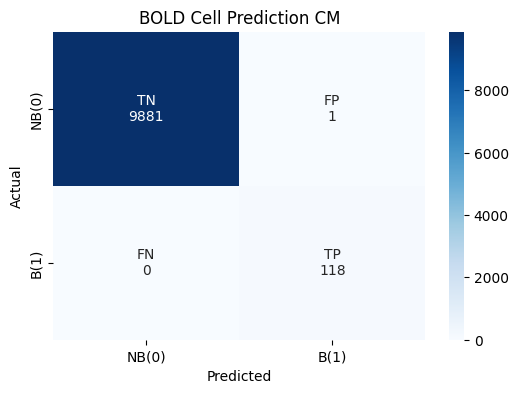


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Params
loc = 0
thresh = 0.9

# Inference on single position of train_loader
infer_one(
    trained_model=trained_model,
    infer_loader=train_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)


Filename: ../data/manual_val/ffelbydefermenttype.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(0,0): 0.91148203611373901367
(6,3): 0.91151005029678344727
(6,2): 0.91151124238967895508
(6,0): 0.91151243448257446289
(5,2): 0.91151291131973266602
(31,0): 0.91151529550552368164
(7,1): 0.91151541471481323242
(5,4): 0.91151559352874755859
(9,1): 0.91151589155197143555
(5,6): 0.91151601076126098633
(8,1): 0.91151630878448486328
(5,16): 0.91151672601699829102
(19,0): 0.91151732206344604492
(27,0): 0.91151762008666992188
(15,0): 0.91151827573776245117
(5,8): 0.91151851415634155273
(5,14): 0.91151869297027587891
(5,12): 0.91151887178421020508
(5,10): 0.91151928901672363281

NB to B ratio: Predicted = 9895:105 | Actual = 9896:104
Accuracy: 99.99% | Precision: 99.05% | Recall: 100.00% | F1-Score: 1.00



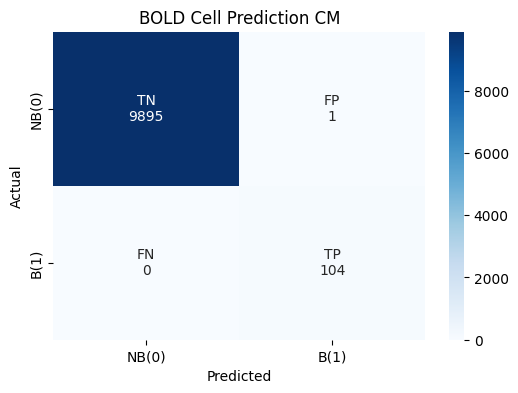


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Inference on single position of val_loader
infer_one(
    trained_model=trained_model,
    infer_loader=val_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)


Filename: ../data/manual_test/dlportfoliobyrepaymentplan.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(5,18): 0.15308873355388641357
(5,4): 0.90371614694595336914
(5,2): 0.90957540273666381836
(5,14): 0.91046625375747680664
(5,16): 0.91048598289489746094
(5,8): 0.91139239072799682617
(5,6): 0.91142243146896362305
(6,3): 0.91151005029678344727
(6,2): 0.91151124238967895508
(0,0): 0.91151225566864013672
(6,0): 0.91151243448257446289
(37,0): 0.91151529550552368164
(9,1): 0.91151541471481323242
(7,1): 0.91151589155197143555
(10,1): 0.91151630878448486328
(5,12): 0.91151702404022216797
(25,0): 0.91151732206344604492
(33,0): 0.91151762008666992188
(5,10): 0.91151809692382812500
(21,0): 0.91151827573776245117
(5,20): 0.91151869297027587891
(29,0): 0.91151887178421020508
(9,0): 0.91151899099349975586
(7,0): 0.91151934862136840820

NB to B ratio: Predicted = 9843:157 | Actual = 9872:128
Accuracy: 99.67% | Precision: 80.25% | Recall: 98.44% | F1-Score: 0.88



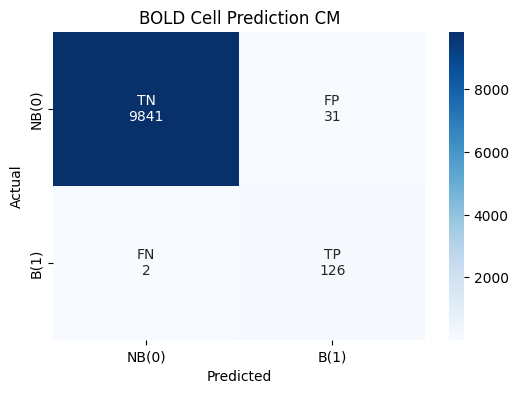


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
8,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
10,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
12,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Inference on single position of test_loader
infer_one(
    trained_model=trained_model,
    infer_loader=test_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)

## All Examples

Batch Inference: 100%|██████████| 1/1 [00:15<00:00, 15.38s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 396665:3335 | Actual = 396714:3286
Accuracy: 99.99% | Precision: 98.53% | Recall: 100.00% | F1-Score: 0.99



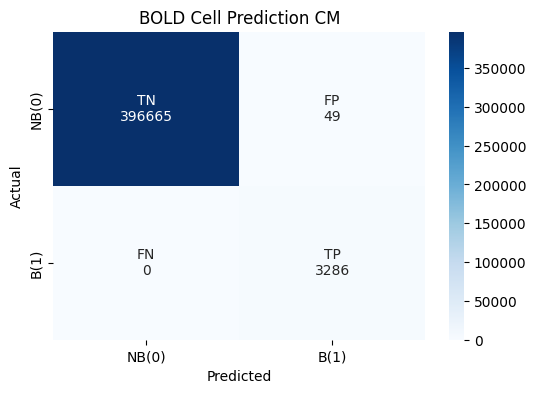

In [ ]:
# Determine batch size to use for inference
infer_batch_size = 40

# Infer across all examples of train_loader
infer_full(
    trained_model=trained_model,
    infer_loader=train_loader,
    batch_size=infer_batch_size,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)

Batch Inference: 100%|██████████| 1/1 [00:14<00:00, 14.92s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 49597:403 | Actual = 49602:398
Accuracy: 99.99% | Precision: 98.76% | Recall: 100.00% | F1-Score: 0.99



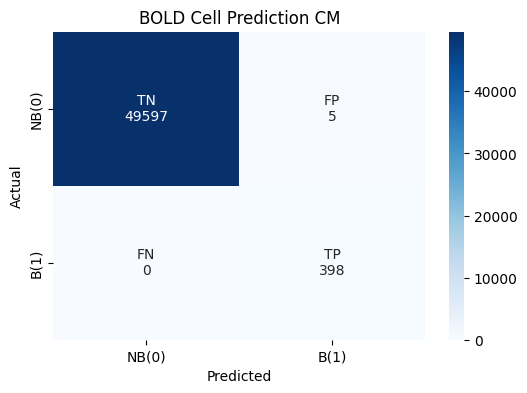

In [ ]:
# Infer across all examples of val_loader
infer_full(
    trained_model=trained_model,
    infer_loader=val_loader,
    batch_size=infer_batch_size,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)

Batch Inference: 100%|██████████| 1/1 [00:14<00:00, 14.97s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 49572:428 | Actual = 49606:394
Accuracy: 99.92% | Precision: 91.59% | Recall: 99.49% | F1-Score: 0.95



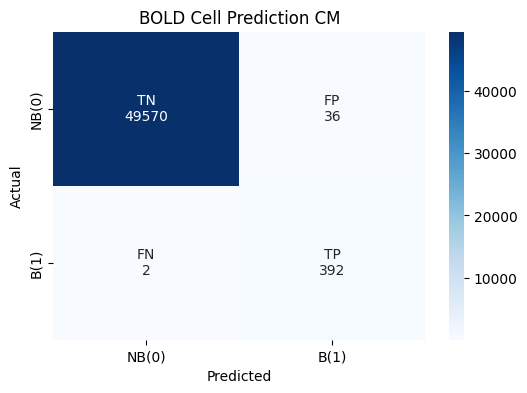

In [ ]:
# Infer across all examples of test_loader
infer_full(
    trained_model=trained_model,
    infer_loader=test_loader,
    batch_size=infer_batch_size,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)